In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
len(X_train)

60000

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

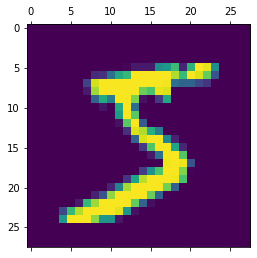

In [10]:
plt.matshow(X_train[0])

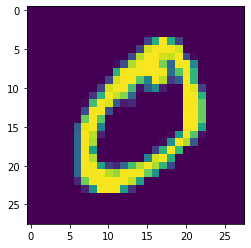

In [11]:
plt.imshow(X_train[1])

Normalisation

In [12]:
X_train=X_train/255
X_test=X_test/255

ANN Model

In [13]:
ann=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2694 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1218 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0852 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [14]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9770


[0.08187659084796906, 0.9769999980926514]

In [15]:
y_pred=ann.predict(X_test)

In [21]:
np.argmax(y_pred[1])

2

In [22]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



CNN Model

In [24]:
cnn=keras.models.Sequential([

    #cnn
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1572 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0599 - accuracy: 0.9864


[0.05988127365708351, 0.9864000082015991]

In [28]:
y_pred=cnn.predict(X_test)

In [29]:
np.argmax(y_pred[1])

2

In [30]:
from sklearn.metrics import classification_report
y_pred = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

